In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

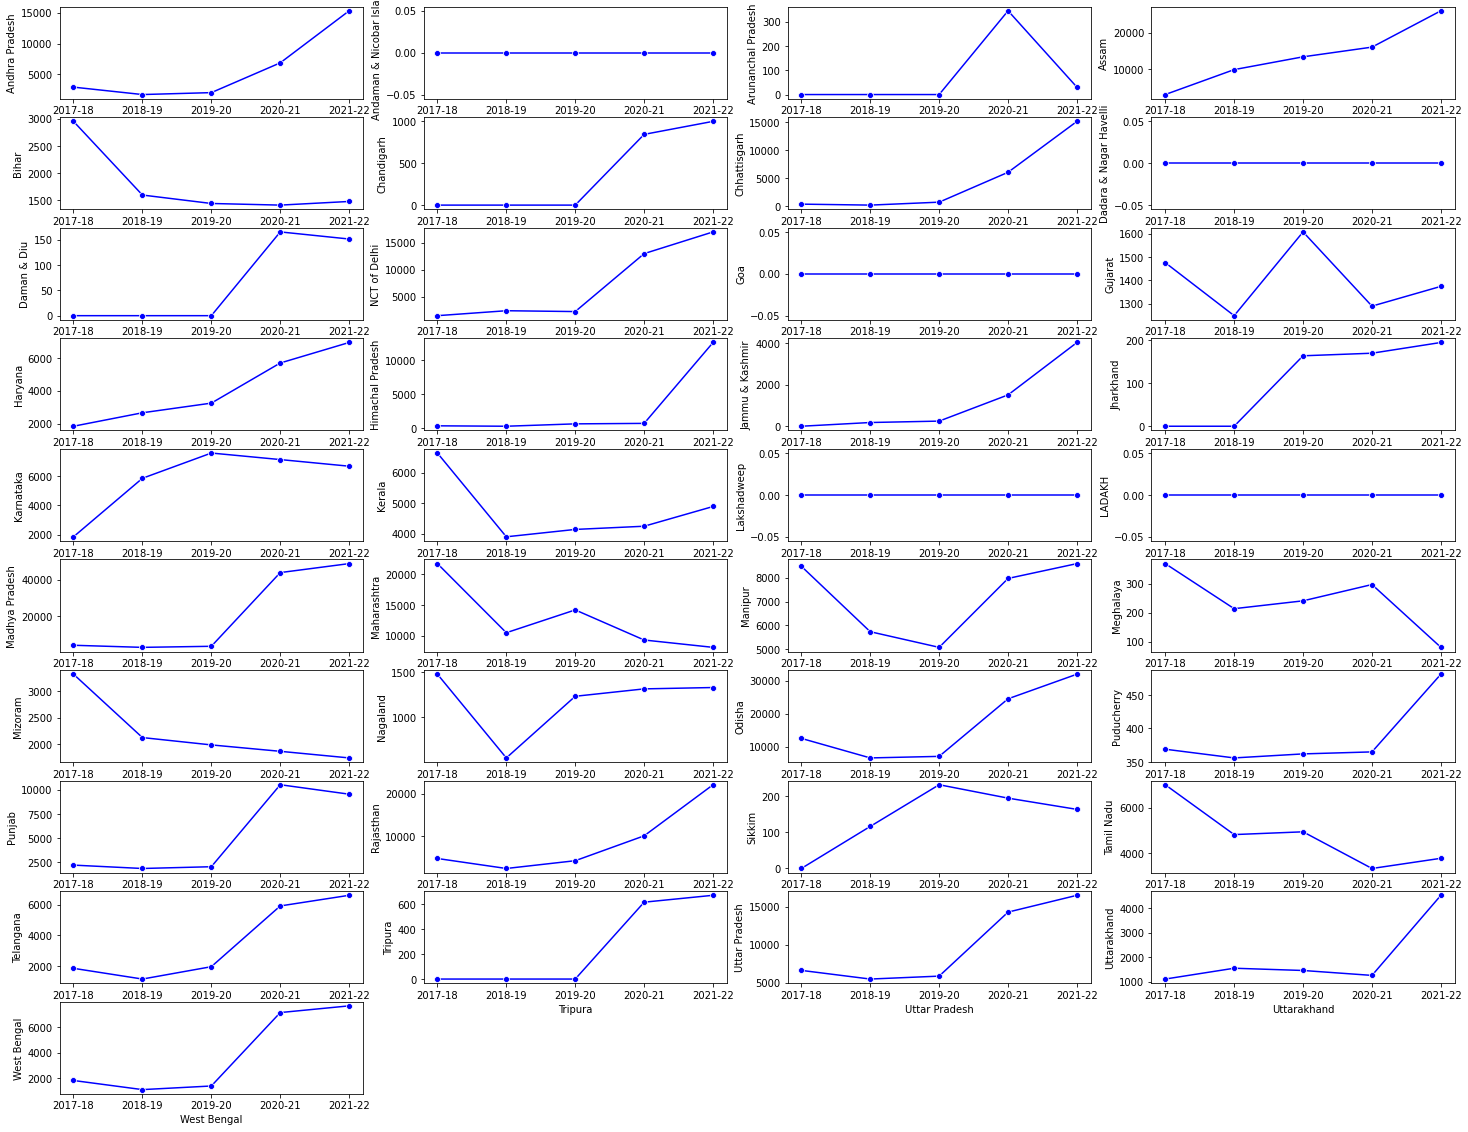

In [3]:

drug_consumption = pd.read_csv("ml project/drug_cases_india.csv")
drug_consumption= drug_consumption[:37]
drug_consumption = drug_consumption.drop(columns="Sl. No.")
drug_consumption_T = drug_consumption.set_index("State Name").T



plt.figure(figsize=(25, 20))

i = 0
for state in drug_consumption_T.columns:
    plt.subplot(10, 4, i+1) 
    sns.lineplot(data=drug_consumption_T[state], marker='o', color='b')

    plt.xlabel(state)
    i+=1


In [4]:
employment_vs_drugs=pd.read_csv('ml project/employment vs opium cases.csv')
employment_vs_drugs

,Year,Opium cases,Heroin Case,Ganja Cases,Employment rate
0,2011,892,2944,4174,52.5
1,2012,876,3155,4468,51.6
2,2013,881,4609,4562,51.1
3,2014,717,4467,5510,50.7
4,2015,860,3931,8130,50.4
5,2016,933,4565,14401,50.0
6,2017,1408,7070,21477,49.7
7,2018,1175,7748,22477,49.3
8,2019,1494,10841,27234,49.3
9,2020,1617,9112,23746,44.0


In [5]:
employment_vs_drugs=employment_vs_drugs.set_index(employment_vs_drugs['Year'])
employment_vs_drugs = employment_vs_drugs.drop(columns=['Year'])
employment_vs_drugs

,Opium cases,Heroin Case,Ganja Cases,Employment rate
Year,,,,
2011,892,2944,4174,52.5
2012,876,3155,4468,51.6
2013,881,4609,4562,51.1
2014,717,4467,5510,50.7
2015,860,3931,8130,50.4
2016,933,4565,14401,50.0
2017,1408,7070,21477,49.7
2018,1175,7748,22477,49.3
2019,1494,10841,27234,49.3


In [6]:
employment_vs_drugs['Total Drug Cases'] = employment_vs_drugs[['Opium cases', 'Heroin Case', 'Ganja Cases']].sum(axis=1)
employment_vs_drugs

,Opium cases,Heroin Case,Ganja Cases,Employment rate,Total Drug Cases
Year,,,,,
2011,892,2944,4174,52.5,8010
2012,876,3155,4468,51.6,8499
2013,881,4609,4562,51.1,10052
2014,717,4467,5510,50.7,10694
2015,860,3931,8130,50.4,12921
2016,933,4565,14401,50.0,19899
2017,1408,7070,21477,49.7,29955
2018,1175,7748,22477,49.3,31400
2019,1494,10841,27234,49.3,39569


In [7]:
correlation = employment_vs_drugs['Total Drug Cases'].corr(employment_vs_drugs['Employment rate'])
print("Correlation between Total Drug Cases and Employment Rate:", correlation)

Correlation between Total Drug Cases and Employment Rate: -0.7639513304578393


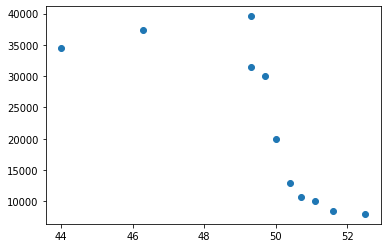

In [8]:
plt.scatter(employment_vs_drugs['Employment rate'],employment_vs_drugs['Total Drug Cases'])
plt.show()

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


india = gpd.read_file('ml project/Indian_States.shp')

print(india)

                       st_nm  \
0   Andaman & Nicobar Island   
1         Arunanchal Pradesh   
2                      Assam   
3                      Bihar   
4                 Chandigarh   
5               Chhattisgarh   
6     Dadara & Nagar Havelli   
7                Daman & Diu   
8                        Goa   
9                    Gujarat   
10                   Haryana   
11          Himachal Pradesh   
12           Jammu & Kashmir   
13                 Jharkhand   
14                 Karnataka   
15                    Kerala   
16               Lakshadweep   
17            Madhya Pradesh   
18               Maharashtra   
19                   Manipur   
20                 Meghalaya   
21                   Mizoram   
22                  Nagaland   
23              NCT of Delhi   
24                Puducherry   
25                    Punjab   
26                 Rajasthan   
27                    Sikkim   
28                Tamil Nadu   
29                 Telangana   
30      

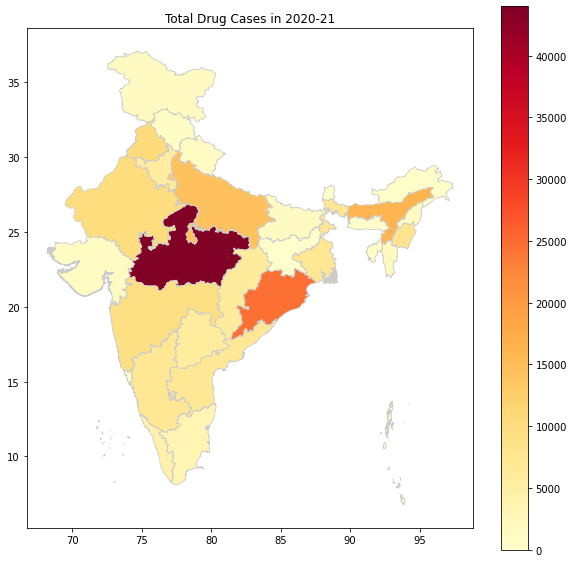

In [10]:
df = pd.read_csv('ml project/drug_cases_india.csv')

merged = india.merge(df, how='left', left_on='st_nm', right_on='State Name')

year = '2020-21'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title(f'Total Drug Cases in {year}')
merged.plot(column=year, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

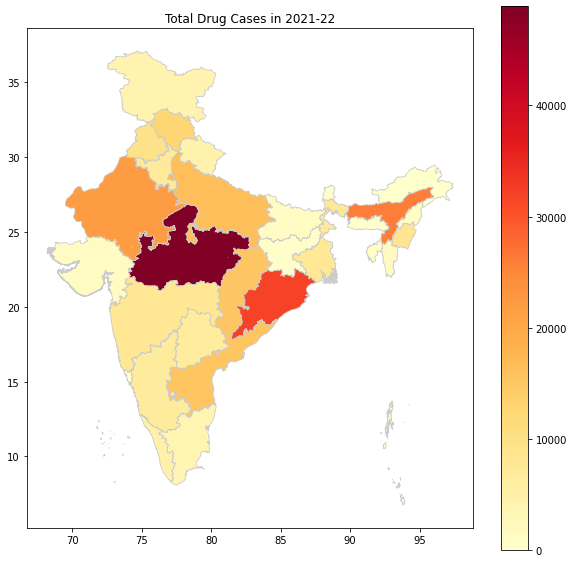

In [11]:
year = '2021-22'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title(f'Total Drug Cases in {year}')
merged.plot(column=year, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


india = gpd.read_file('ml project/Indian_States.shp')


df = pd.read_csv('ml project/drug_cases_india.csv')


def plot_choropleth(year):
    
    merged = india.merge(df, how='left', left_on='st_nm', right_on='State Name')
    
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title(f'Total Drug Cases in {year}')
    merged.plot(column=year, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.show()


year_slider = widgets.SelectionSlider(
    options=df.columns[1:],  
    value=df.columns[-1],  
    description='Year:',
    continuous_update=False
)


widgets.interactive(plot_choropleth, year=year_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Year:', index=5, options=('State N…

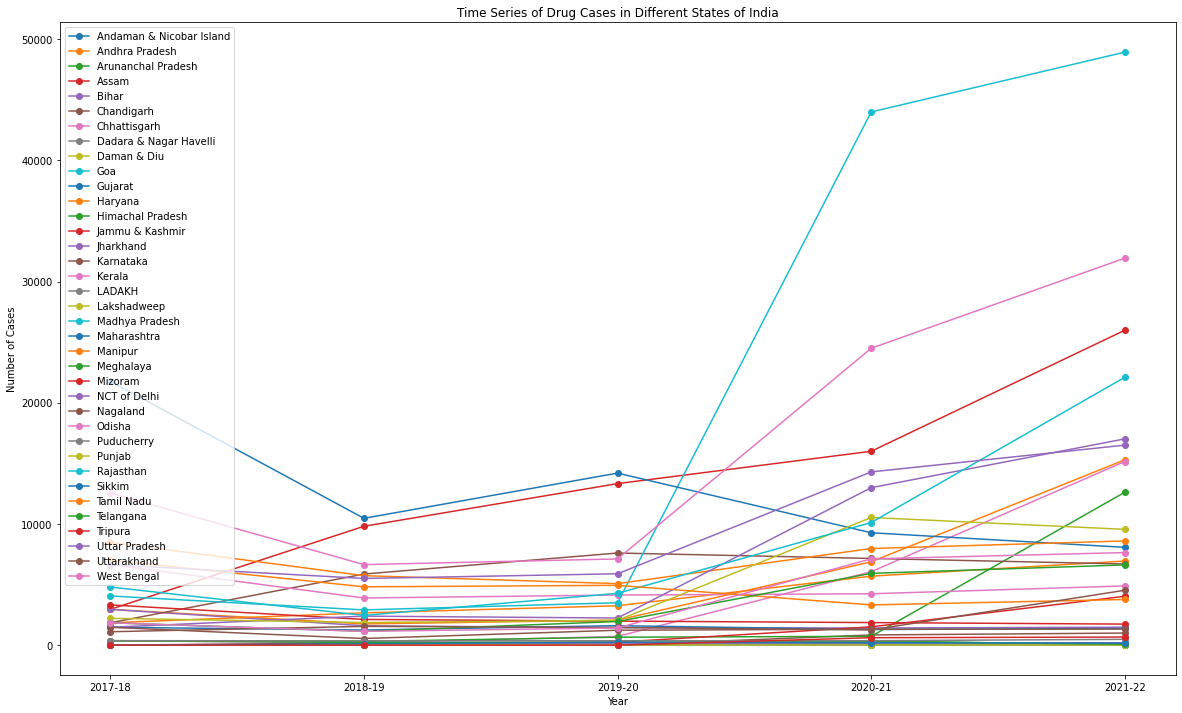

In [13]:
"""
Below we are trying to make a time series graph and try to observe if there are any outliers(states) <- this will require more attention than other states
"""
df = pd.read_csv('ml project/drug_cases_india_area.csv')
df = df.drop(columns=["Unnamed: 7", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14"])


melted_df = pd.melt(df, id_vars=['Sl. No.', 'State Name'], var_name='Year', value_name='Number of Cases', value_vars=['2017-18', '2018-19', '2019-20', '2020-21', '2021-22'])


plt.figure(figsize=(20, 12))
for state, group in melted_df.groupby('State Name'):
    plt.plot(group['Year'], group['Number of Cases'], label=state, marker="o")

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Time Series of Drug Cases in Different States of India')
plt.legend()
plt.show()

In [14]:
df = pd.read_csv('ml project/drug_cases_india_area.csv')

df=df.drop(columns=["Area","Unnamed: 7", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14"])

df = df.melt(id_vars=['Sl. No.', 'State Name'], var_name='Year', value_name='Number of Cases')

def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

all_year_outliars = {}

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    outliers = detect_outliers(year_data, 'Number of Cases')
    if not outliers.empty:
        print(f"Outlier states in {year}:")
        print(outliers['State Name'].unique())
        all_year_outliars[year] = outliers
        print()



Outlier states in 2017-18:
['Maharashtra' 'Manipur' 'Odisha']

Outlier states in 2018-19:
['Assam' 'Maharashtra']

Outlier states in 2019-20:
['Assam' 'Maharashtra']

Outlier states in 2020-21:
['Madhya Pradesh' 'Odisha']

Outlier states in 2021-22:
['Assam' 'Madhya Pradesh' 'Odisha']



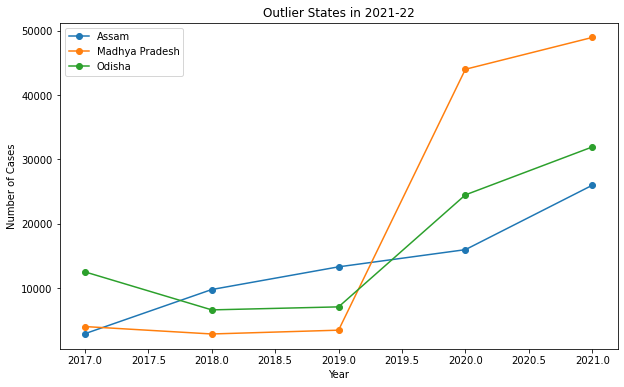

In [48]:

outlier_states_2021_22 = all_year_outliars["2021-22"]["State Name"].unique()
final_data = df[df['State Name'].isin(outlier_states_2021_22)]
colors = {}
plt.figure(figsize=(10, 6))
for state, group in final_data.groupby('State Name'):
    plt.plot(group['Year'], group['Number of Cases'], label=state, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Outlier States in 2021-22')
plt.legend()
plt.xticks()
plt.show()


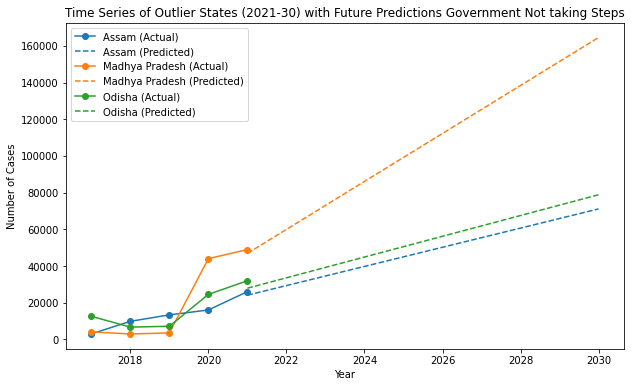

In [54]:
""" 
The above graph is the current condition for the outlier states of 2021-22 with regard to drug cases each year, Let's predict this for a span till 2030 and see 
how bad the condition can get if no action by their respective government is not taken. 
"""
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
if "-" in str(final_data.iloc[0]["Year"]):
    final_data['Year'] = final_data['Year'].str.extract(r'(\d+)').astype(int)

i = 0
for state, group in final_data.groupby('State Name'):
    group['Year'] = pd.to_numeric(group['Year'])

    X = group['Year'].values.reshape(-1, 1)
    y = group['Number of Cases'].values
    model = LinearRegression().fit(X, y)

    future_years = range(2021, 2031)
    future_X = pd.DataFrame({'Year': future_years})
    future_predictions = model.predict(future_X['Year'].values.reshape(-1, 1))


    plt.plot(group['Year'], group['Number of Cases'], label=f'{state} (Actual)', marker='o', color=colors[i])
    plt.plot(future_X['Year'], future_predictions, label=f'{state} (Predicted)', linestyle='--', color=colors[i])
    i+=1

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Time Series of Outlier States (2021-30) with Future Predictions Government Not taking Steps')
plt.legend()
plt.xticks()
plt.show()



In [61]:
slopes = {}
data_final_data = df
if "-" in str(data_final_data.iloc[0]["Year"]):
    data_final_data['Year'] = data_final_data['Year'].str.extract(r'(\d+)').astype(int)

for state, group in data_final_data.groupby('State Name'):
    X = group['Year'].values.reshape(-1, 1)
    y = group['Number of Cases'].values

    model = LinearRegression().fit(X, y)
    
    slope = model.coef_[0]
    
    slopes[state] = slope

states_with_decreasing_slope = [state for state, slope in slopes.items() if slope < 0]

print("States with a decreasing slope")
for state in states_with_decreasing_slope:
    print(state)
print("\n\n")


"""
We have found the states with decreasing slope, meaning number of cases in these states are decreasing with year

Based on this let's find out the percentage decrease for these states from their initial point till yet.
"""
decreasing_states = df.loc[(df["State Name"].isin(states_with_decreasing_slope))]

states_yearly_decrease_average = {}
for state in decreasing_states["State Name"].unique():
    total_percentage_decrease = 0
    count = 0
    years = decreasing_states.loc[(decreasing_states["State Name"] == state)]["Year"].unique()
    for i in range(len(years) - 1):
        
        x = decreasing_states.loc[(df['State Name']== state) & (df['Year'] == years[i]),['Number of Cases']].values[0][0]
        y = decreasing_states.loc[(df['State Name']== state) & (df['Year'] == years[i+1]),['Number of Cases']].values[0][0]
        percentage_decrease = ((y - x) / x)
        total_percentage_decrease += percentage_decrease
        count += 1

        
    states_yearly_decrease_average[state] = total_percentage_decrease / count
    print(f"Average Yearly decrease for {state} is {states_yearly_decrease_average[state]}")

final_average_for_yearly_decrease = sum(states_yearly_decrease_average.values()) / len(states_yearly_decrease_average)

print(f"Across all the states, the average for yearly decrease in drug cases is {final_average_for_yearly_decrease}")

"""
Let's use the above average for yearly decrease to predict where our outliers state will go considering same yearly average is taken for them as well.
"""

    

States with a decreasing slope
Bihar
Gujarat
Kerala
Maharashtra
Meghalaya
Mizoram
Tamil Nadu



Average Yearly decrease for Bihar is -0.1321653078957367
Average Yearly decrease for Gujarat is 0.00038737508122791905
Average Yearly decrease for Kerala is -0.04339692963003735
Average Yearly decrease for Maharashtra is -0.15984044778542805
Average Yearly decrease for Meghalaya is -0.19719838957186286
Average Yearly decrease for Mizoram is -0.13867271211618445
Average Yearly decrease for Tamil Nadu is -0.12004289952583308
Across all the states, the average for yearly decrease in drug cases is -0.11298990163483638


"\nLet's use the above average for yearly decrease to predict where our outliers state will go considering same yearly average is taken for them as well.\n"

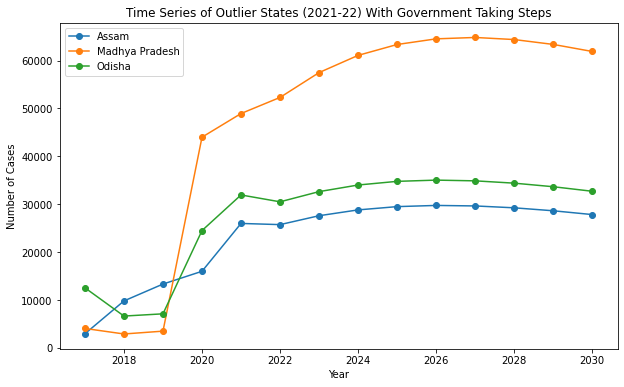

In [66]:
"""
From the above predictions we can conclude that the condition for the states will go much worse if no actions are taken against drugs, The above is just a 
plot for drug related cases, But we have already seen relations between drugs and other socioeconomic factors, Those conditions will go worse as well.
"""
plt.figure(figsize=(10, 6))

percentage_decrease = final_average_for_yearly_decrease

for state, group in final_data.groupby('State Name'):
    group['Year'] = pd.to_numeric(group['Year'])

    X = group['Year'].values.reshape(-1, 1)
    y = group['Number of Cases'].values

    decrease_rate = 1 - percentage_decrease
    slope = decrease_rate ** np.arange(len(group)) 

    model = LinearRegression().fit(X, y * slope)

    future_years = range(2022, 2031)
    future_X = pd.DataFrame({'Year': future_years})

    future_slope = decrease_rate ** (len(group) + np.arange(len(future_years))) 

    future_predictions = model.predict(future_X['Year'].values.reshape(-1, 1)) / future_slope
    new_group = group
    new_group = pd.concat([new_group, pd.DataFrame({"Year":future_X["Year"], "Number of Cases": future_predictions})])
    
    plt.plot(new_group['Year'], new_group['Number of Cases'], label=f'{state}', marker='o')
    

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Time Series of Outlier States (2021-22) With Government Taking Steps')
plt.legend()
plt.xticks()
plt.show()
